## 1.Подготовительные операции
### 1.1.Инициализация

In [44]:
# Моделирование фазоманипулированных сигналов

import numpy as np
import matplotlib.pyplot as plt
import extrafuncs
from matplotlib import cm
from matplotlib import rcParams
from extrafuncs import getNote
from IPython.display import Audio
from scipy import signal
from scipy.io.wavfile import write

time: 3.26 ms


In [2]:
# Графики непосредственно в ноутбуке
%matplotlib inline
# Подсчёт время выполнения ячейки
%load_ext autotime

In [48]:
# Настройка параметров шрифта
# и настройка LaTex для вставки в заголовки на графике

fontSize = 12.0   # Размер шрифта графиков
titleFontSize = 16.0    # Размер шрифта заголовка
fontName = "Liberation Serif"    # Название шрифта
rcParams["mathtext.fontset"] = "custom" # Пользовательские параметры графика
rcParams["mathtext.rm"] = fontName  # Обычный стиль
rcParams["mathtext.bf"] = fontName + ":bold"    # Жирный
rcParams["mathtext.it"] = fontName + ":italic"  # Курсив

time: 4.7 ms


In [49]:
# Параметры графика

PIC_SIZE = (10, 6)  # Размер графика
PIC_DENSITY = 80    # Плотность пикселей графика
SURFACE_CMAP = cm.plasma    # Цвет поверхностей
tColor = "#0072BD"  # Цвет графиков во временной области (синий)
tColorLight = "#4DB3E6"   # Временная область (голубой)
Color0 = "#FF0000"  # Цвет графиков эталонного сигнала (красный)
fColor = "#FF6600"     # Частотная область
eColor = "#D95319"    # Погрешности
eColorLight = "#E6E666"   # Погрешности
eColorDark = "#A2142F"    # Погрешности

time: 1.52 ms


### 1.2.Формирование значений основых параметров

In [50]:
fd = 1025    # Частота дискретизации
audiorate = 4000  # Частота дискретизации аудиофайла
Td = 1 / fd    # Период дискретизации
snrSound = 3 # Уровень шума, дБ
# Длительности нот
t05= np.arange(0, 0.5, Td)  # 0.5 с
t07 = np.arange(0, 0.7, Td)  # 0.7 с
t09 = np.arange(0, 0.9, Td)  # 0.9 с
t10 = np.arange(0, 1.0, Td)   # 1.0 с
t15 = np.arange(0, 1.5, Td) # 1.5 с
t30 = np.arange(0, 3.0, Td)   # 3.0 с
# Определение обозначений для нот
Z_t10 = np.zeros(t10.size)  # пауза 1 с
# Частоты нот первой октавы
A4 = 440.000  # частота ноты ЛЯ,Гц
C4 = A4 * np.power(2, -9 / 12)  # частота ноты ДО,Гц
D4 = A4 * np.power(2, -7 / 12)  # частота ноты РЕ,Гц
D4d = A4 * np.power(2, -6 / 12) # частота ноты РЕ#,Гц
E4 = A4 * np.power(2, -5 / 12)  # частота ноты МИ,Гц
F4 = A4 * np.power(2, -4 / 12)  # частота ноты ФА,Гц
G4 = A4 * np.power(2, -2 / 12)  # частота ноты СОЛЬ,Гц
A4 = A4 * np.power(2, 0 / 12)   # частота ноты ЛЯ,Гц
B4 = A4 * np.power(2, 2 / 12)   # частота ноты СИ,Гц
# Ноты малой октавы
D3 = A4 * np.power(2, -19 / 12) # частота ноты РЕ,Гц
E3 = A4 * np.power(2, -17 / 12) # частота ноты МИ,Гц
F3d = A4 * np.power(2, -15 / 12)# частота ноты ФА#,Гц
G3 = A4 * np.power(2, -14 / 12) # частота ноты СОЛЬ,Гц
A3 = A4 * np.power(2, -12 / 12) # частота ноты ЛЯ,Гц
A3d = A4 * np.power(2, -11 / 12)# частота ноты ЛЯ#,Гц
B3 = A4 * np.power(2, -10 / 12) # частота ноты СИ,Гц

time: 12 ms


## 2.Моделирование звукового ряда нот первой октавы
### 2.1.Формирование звукового ряда

In [51]:
# Формирование нотной последовательности

gamma_notes = np.concatenate((Z_t10, extrafuncs.getNote(C4, t10), Z_t10, extrafuncs.getNote(D4, t10),
Z_t10, extrafuncs.getNote(E4, t10), Z_t10, extrafuncs.getNote(F4, t10),
Z_t10, extrafuncs.getNote(G4, t10), Z_t10, extrafuncs.getNote(A4, t10),
Z_t10, extrafuncs.getNote(B4, t10), Z_t10))
# Формирование сигнала нотной последовательности во временной области
N_gamma = gamma_notes.size / t10.size
xtime = np.linspace(0., N_gamma, int(N_gamma * fd)) # Область определения

time: 6.57 ms


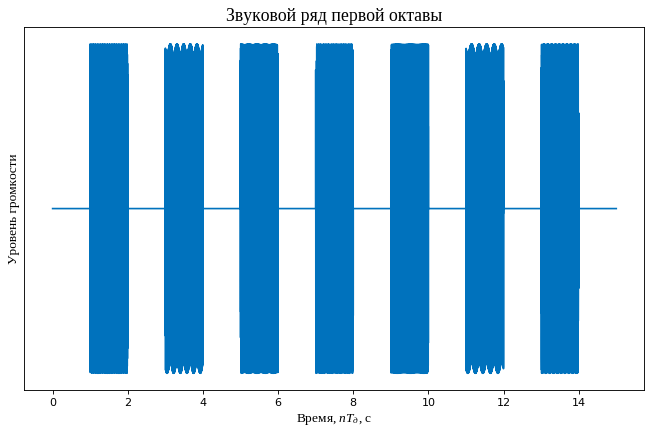

time: 1.12 s


In [52]:
# Формирование графика

fig = plt.figure(figsize=PIC_SIZE, dpi=PIC_DENSITY) # Установка параметров графика
plt.title("Звуковой ряд первой октавы", fontname=fontName, fontsize=titleFontSize)  # Заголовок
plt.xlabel(r"Время, $\mathit{nT_д}$, с", fontname=fontName, fontsize=fontSize)  # Надпись оси абсцисс
plt.ylabel("Уровень громкости", fontname=fontName, fontsize=fontSize)   # Надпись оси ордиант
plt.yticks([])  # Нет значений на оси ординат
plt.plot(xtime, gamma_notes, color=tColor)

plt.show()  # Построение графика

### 2.2.Формирование спектра мощности

In [53]:
# Формирование спектра мощности

freq, fpNotes = signal.periodogram(gamma_notes, fs=fd)

time: 7.28 ms


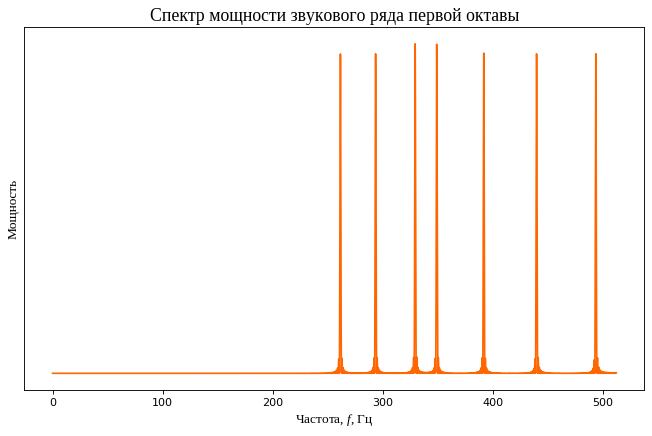

time: 598 ms


In [54]:
# Формирование графика

fig = plt.figure(figsize=PIC_SIZE, dpi=PIC_DENSITY) # Установка параметров графика
plt.title("Спектр мощности звукового ряда первой октавы", fontname=fontName, fontsize=titleFontSize)  # Заголовок
plt.xlabel(r"Частота, $\mathit{f}$, Гц", fontname=fontName, fontsize=fontSize)  # Надпись оси абсцисс
plt.ylabel("Мощность", fontname=fontName, fontsize=fontSize)   # Надпись оси ордиант
plt.yticks([])  # Нет значений на оси ординат
plt.plot(freq, fpNotes, color=fColor)
plt.show()  # Построение графика

### 2.3.Формирование спектрограммы

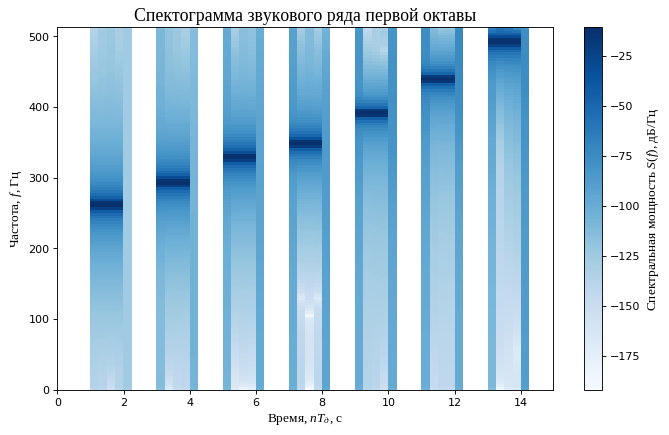

time: 1.32 s


In [55]:
# Формирование спектрограммы звукового ряда

fig = plt.figure(figsize=PIC_SIZE, dpi=PIC_DENSITY) # Установка параметров графика
ax = fig.gca()
plt.title("Спектограмма звукового ряда первой октавы", fontname=fontName, fontsize=titleFontSize)  # Заголовок
plt.xlabel(r"Время, $\mathit{nТ_д}$, с", fontname=fontName, fontsize=fontSize)  # Надпись оси абсцисс
plt.ylabel(r"Частота, $\mathit{f}$, Гц", fontname=fontName, fontsize=fontSize)   # Надпись оси ордиант
pxx, freqs, ts, cax = plt.specgram(gamma_notes, Fs=fd, scale="dB", NFFT=256, noverlap=0, cmap=cm.Blues)
cb = fig.colorbar(cax) # Добавление цветовой шкалы
cb.set_label(label=r"Спектральная мощность $\mathit{S(f)}$, дБ/Гц", fontsize=fontSize, fontname=fontName)   # Изменение параметров шрифта цветовой шкалы

plt.show()  # Построение графика

### 2.4.Проигрывание и сохранение в файл звукового ряда

In [56]:
# Проигрывание гаммы
Audio(gamma_notes, rate=audiorate)

time: 6.83 ms


In [57]:
# Запись мелодии в WAV-файл
write("gamma_4000.wav", audiorate, gamma_notes)

time: 4.23 ms


## 3.Моделирование шума звукового ряда
### 3.1.Формирование шума звукового ряда

In [59]:
# Формирование шума нотной последовательности
mu, sigma = 0, 0.5  # Параметры стандартного распределения
ngamma_notes = extrafuncs.awgn(mu, sigma, gamma_notes)

time: 2.97 ms


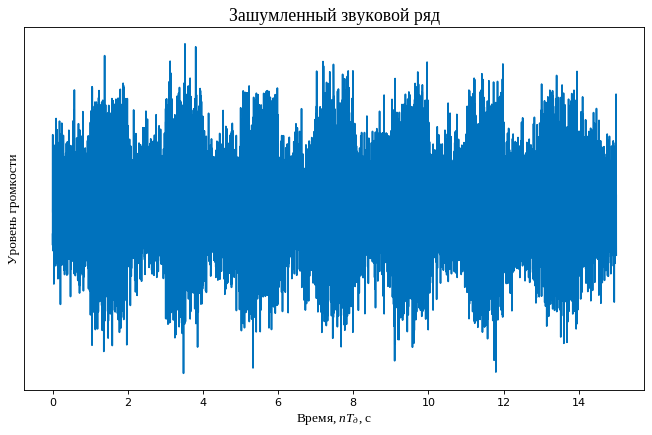

time: 1.08 s


In [60]:
# Формирование графика

fig = plt.figure(figsize=PIC_SIZE, dpi=PIC_DENSITY) # Установка параметров графика
plt.title("Зашумленный звуковой ряд", fontname=fontName, fontsize=titleFontSize)  # Заголовок
plt.xlabel(r"Время, $\mathit{nT_д}$, с", fontname=fontName, fontsize=fontSize)  # Надпись оси абсцисс
plt.ylabel("Уровень громкости", fontname=fontName, fontsize=fontSize)   # Надпись оси ордиант
plt.yticks([])  # Нет значений на оси ординат
plt.plot(xtime, ngamma_notes, color=tColor)
plt.show()  # Построение графика

### 3.2.Формирование спектра мощности

In [61]:
# Формирование спектра мощности

freq, fpNotes = signal.periodogram(ngamma_notes, fs=fd)

time: 5.14 ms


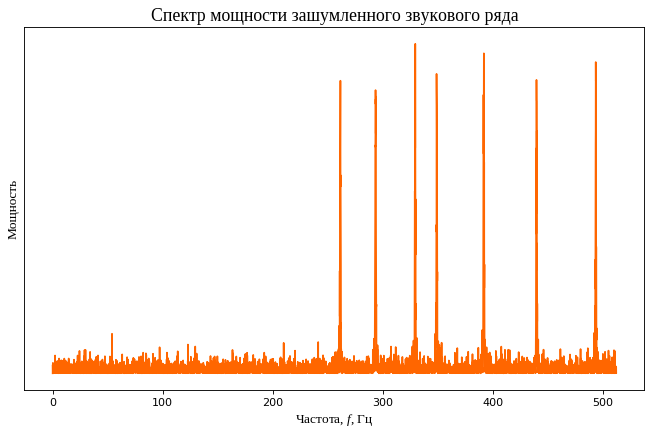

time: 627 ms


In [62]:
# Формирование графика

fig = plt.figure(figsize=PIC_SIZE, dpi=PIC_DENSITY) # Установка параметров графика
plt.title("Спектр мощности зашумленного звукового ряда", fontname=fontName, fontsize=titleFontSize)  # Заголовок
plt.xlabel(r"Частота, $\mathit{f}$, Гц", fontname=fontName, fontsize=fontSize)  # Надпись оси абсцисс
plt.ylabel("Мощность", fontname=fontName, fontsize=fontSize)   # Надпись оси ордиант
plt.yticks([])  # Нет значений на оси ординат
plt.plot(freq, fpNotes, color=fColor)
plt.show()  # Построение графика

### 3.3.Формирование спектрограммы

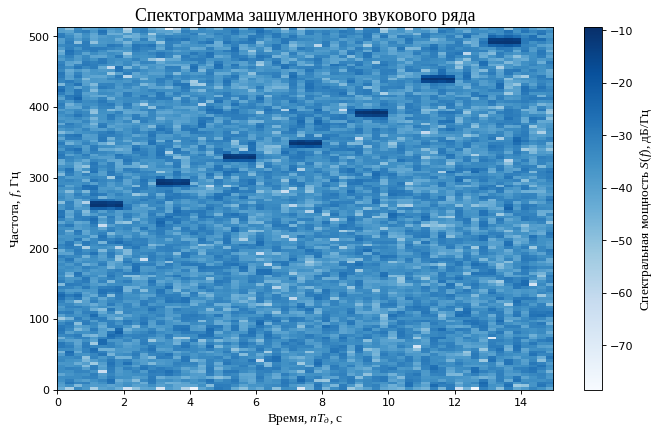

time: 2.25 s


In [63]:
# Формирование спектрограммы звукового ряда

fig = plt.figure(figsize=PIC_SIZE, dpi=PIC_DENSITY) # Установка параметров графика
ax = fig.gca()
plt.title("Спектограмма зашумленного звукового ряда", fontname=fontName, fontsize=titleFontSize)  # Заголовок
plt.xlabel(r"Время, $\mathit{nТ_д}$, с", fontname=fontName, fontsize=fontSize)  # Надпись оси абсцисс
plt.ylabel(r"Частота, $\mathit{f}$, Гц", fontname=fontName, fontsize=fontSize)   # Надпись оси ордиант
pxx, freqs, ts, cax = plt.specgram(ngamma_notes, Fs=fd, scale="dB", NFFT=256, noverlap=0, cmap=cm.Blues)
cb = fig.colorbar(cax) # Добавление цветовой шкалы
cb.set_label(label=r"Спектральная мощность $\mathit{S(f)}$, дБ/Гц", fontsize=fontSize, fontname=fontName)   # Изменение параметров шрифта цветовой шкалы

plt.show()  # Построение графика

### 3.4.Проигрывание и сохранение в файл звукового ряда

In [64]:
# Проигрывание гаммы
Audio(ngamma_notes, rate=audiorate)

time: 8.3 ms


In [65]:
# Запись мелодии в WAV-файл
write("noisygamma_4000.wav", audiorate, ngamma_notes)

time: 3.43 ms


## 4.Формирование мелодии
### 4.1.Формирование массива нот

In [66]:
# Формирование массива-мелодии
sw_notes = np.concatenate((getNote(D3,t05),getNote(D3,t05),getNote(D3,t05),getNote(G3,t15),
getNote(D3,t15),getNote(C4,t05),getNote(B3,t05),getNote(A3,t05),
getNote(G4,t15),getNote(D3,t07),getNote(C4,t05),getNote(B3,t05),
getNote(A3,t05),getNote(G4,t15),getNote(D3,t07),getNote(C4,t05),
getNote(B3,t05),getNote(C4,t05),getNote(A3,t15),getNote(D3,t07),
getNote(D3,t05),getNote(G3,t15),getNote(D3,t15),getNote(C4,t05),
getNote(B3,t05),getNote(A3,t05),getNote(G4,t15),getNote(D3,t07),
getNote(C4,t05),getNote(B3,t05),getNote(A3,t05),getNote(G4,t15),
getNote(D3,t07),getNote(C4,t05),getNote(B3,t05),getNote(C4,t05),
getNote(A3,t15),getNote(D3,t07),getNote(D3,t05),getNote(E3,t09),
getNote(E3,t07),getNote(C4,t07),getNote(B3,t07),getNote(A3,t07),
getNote(G3,t07),getNote(G3,t05),getNote(A3,t05),getNote(B3,t05),
getNote(A3,t07),getNote(E3,t05),getNote(F3d,t09),getNote(D3,t07),
getNote(D3,t05),getNote(E3,t09),getNote(E3,t07),getNote(C4,t07),
getNote(B3,t07),getNote(A3,t07),getNote(G3,t07),getNote(D3,t07),
getNote(A3,t05),getNote(A3,t15),getNote(D3,t07),getNote(D3,t05),
getNote(E3,t09),getNote(E3,t07),getNote(C4,t07),getNote(B3,t07),
getNote(A3,t07),getNote(G3,t07),getNote(G3,t05),getNote(A3,t05),
getNote(B3,t05),getNote(A3,t07),getNote(E3,t07),getNote(F3d,t05),
getNote(D3,t09),getNote(D3,t05),getNote(G4,t07),getNote(F4,t05),
getNote(D3,t07),getNote(D4,t05),getNote(C4,t07),getNote(A3,t05),
getNote(A3,t07),getNote(G3,t05),getNote(D3,t30)))

time: 14.6 ms


### 4.2.Проигрывание и сохранение в файл мелодии

In [67]:
# Проигрывание мелодии
Audio(sw_notes, rate=audiorate)

time: 9.42 ms


In [68]:
# Запись мелодии в WAV-файл
write("melody.wav", audiorate, sw_notes)

time: 3.58 ms
